<a href="https://colab.research.google.com/github/OfficialAdityaPilania/Cafe-sales-dashboard/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon.csv')

# Preview the data
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
dtypes: object(14)
memory usage: 160.4+ KB


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [6]:
df.dropna(subset=['rating_count'], inplace=True)


In [7]:
# Remove ₹ and commas, convert to float
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

# Drop rows with missing values in important columns
df.dropna(subset=['product_name', 'category', 'actual_price', 'rating'], inplace=True)


In [8]:
top_rated = df.sort_values(by='rating', ascending=False).head(10)
top_rated[['product_name', 'category', 'rating', 'rating_count']]


,product_name,category,rating,rating_count
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,5.0,23
174,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,5.0,5
1145,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8,53803
1201,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8,28
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8,3964
1226,Zuvexa USB Rechargeable Electric Foam Maker - ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,54
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,2300
459,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,4.7,7779
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,1729
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",4.7,5935


In [9]:
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Sort and get top 10 products by discount %
top_discount_percent = df.sort_values(by='discount_percentage', ascending=False).head(10)

# Display relevant columns
top_discount_percent[['product_name', 'actual_price', 'discounted_price', 'discount_percentage']]

,product_name,actual_price,discounted_price,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4999.0,294.0,94.118824
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,91.004550
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,91.004550
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,91.004550
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,91.004550
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,91.004550
602,LAPSTER Spiral Charger Spiral Charger Cable Pr...,999.0,99.0,90.090090
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,999.0,99.0,90.090090
920,"Silicone Rubber Earbuds Tips, Eartips, Earpads...",999.0,99.0,90.090090
644,Sounce Spiral Charger Cable Protector Data Cab...,999.0,99.0,90.090090


In [10]:
most_reviewed = df.sort_values(by='rating_count', ascending=False).head(10)
most_reviewed[['product_name', 'rating_count', 'rating']]


,product_name,rating_count,rating
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973,4.4
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973,4.4
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973,4.4
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972,4.4
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713,4.1
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713,4.1
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711,4.1
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836,4.1
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836,4.1
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832,4.1


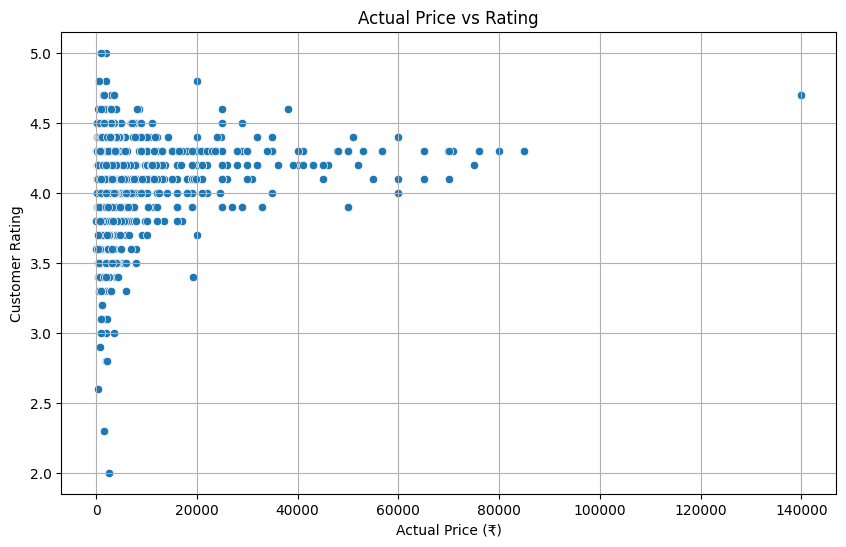

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='rating')
plt.title('Actual Price vs Rating')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()


In [18]:
df['estimated_profit'] = df['actual_price'] - df['discounted_price']

df['profit_margin_%'] = (df['estimated_profit'] / df['actual_price']) * 100

most_profitable = df.sort_values(by='profit_margin_%', ascending=False).head(10)
most_profitable[['product_name', 'actual_price', 'discounted_price', 'estimated_profit', 'profit_margin_%']]


,product_name,actual_price,discounted_price,estimated_profit,profit_margin_%
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4999.0,294.0,4705.0,94.118824
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,18200.0,91.004550
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,18200.0,91.004550
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,18200.0,91.004550
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,18200.0,91.004550
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",19999.0,1799.0,18200.0,91.004550
602,LAPSTER Spiral Charger Spiral Charger Cable Pr...,999.0,99.0,900.0,90.090090
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,999.0,99.0,900.0,90.090090
920,"Silicone Rubber Earbuds Tips, Eartips, Earpads...",999.0,99.0,900.0,90.090090
644,Sounce Spiral Charger Cable Protector Data Cab...,999.0,99.0,900.0,90.090090
